<a href="https://colab.research.google.com/github/nicklehourites/DSP-461-Final-Project/blob/main/My__CSC461_LR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd              # For data handling
import numpy as np               # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler      # For feature scaling
from sklearn.linear_model import LogisticRegression   # For logistic regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation


In [ ]:
import pandas as pd              # For data handling
import numpy as np               # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler      # For feature scaling
from sklearn.linear_model import LogisticRegression   # For logistic regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation


In [ ]:
# list past copies
!ls -lh | grep "DSP 461 Project"


# delete past copies uploaded
!rm -f DSP\ 461\ Project*.csv
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
import pandas as pd

# Use quotes around the exact file name
data = pd.read_csv('data.csv')


In [ ]:
data.head()       # Display first few rows
data.info()       # Check structure and data types
data.shape        # Check rows and columns count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Non-Null C

(4424, 1)

In [ ]:
# Check all column names
print(data.columns)

# See data types and missing values
data.info()

# Check unique values in the target column (if known)
print(data['Target'].unique())  # Replaced 'Dropout' with 'Target'


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
# Convert target variable to numerical labels
label_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
data['Target'] = data['Target'].map(label_mapping)

# Define features (X) and target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3539, 36)
X_test shape: (885, 36)
y_train shape: (3539,)
y_test shape: (885,)


In [ ]:
import pandas as pd

# Use quotes around the exact file name and specify semicolon delimiter
data = pd.read_csv('data.csv', sep=';')


In [ ]:
# Separate predictors (X) and dependent variable (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Convert categorical variables to numeric (if any)
X = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy Score:", accuracy)

# Confusion Matrix
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Classification Report
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy Score: 0.752542372881356

🧾 Confusion Matrix:
 [[244  45  27]
 [ 14 380  24]
 [ 35  74  42]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       316
           1       0.76      0.91      0.83       418
           2       0.45      0.28      0.34       151

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



In [ ]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

importance.head(10)  # Top 10 influential features


,Feature,Coefficient
28,Curricular units 2nd sem (enrolled),0.923286
19,Age at enrollment,0.287773
21,Curricular units 1st sem (credited),0.263939
27,Curricular units 2nd sem (credited),0.254670
3,Course,0.228884
25,Curricular units 1st sem (grade),0.227089
33,Unemployment rate,0.159017
7,Nacionality,0.156104
15,Debtor,0.130601
22,Curricular units 1st sem (enrolled),0.126492


/tmp/ipython-input-2585843454.py:17: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


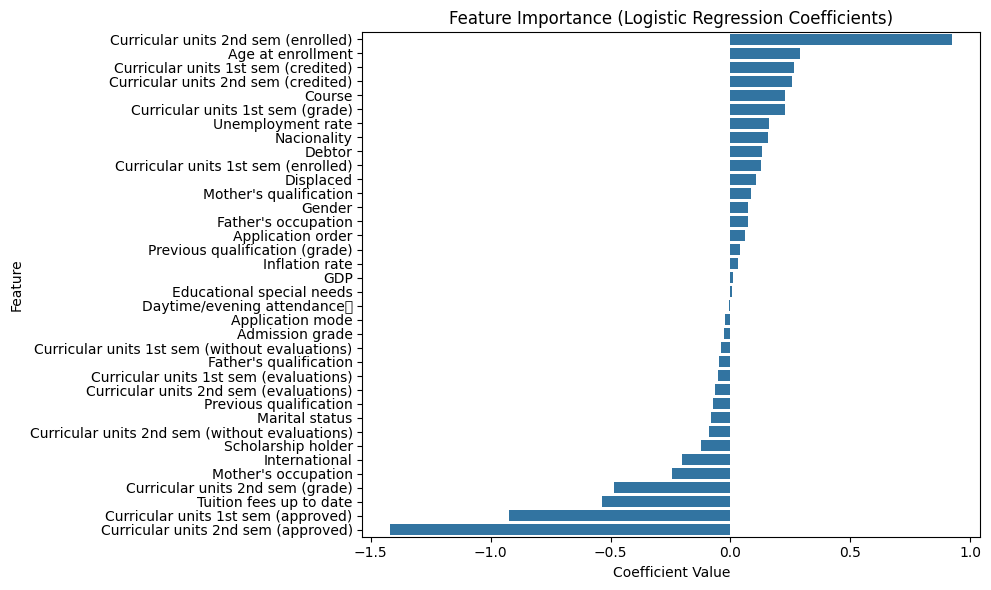

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert coefficients to DataFrame
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


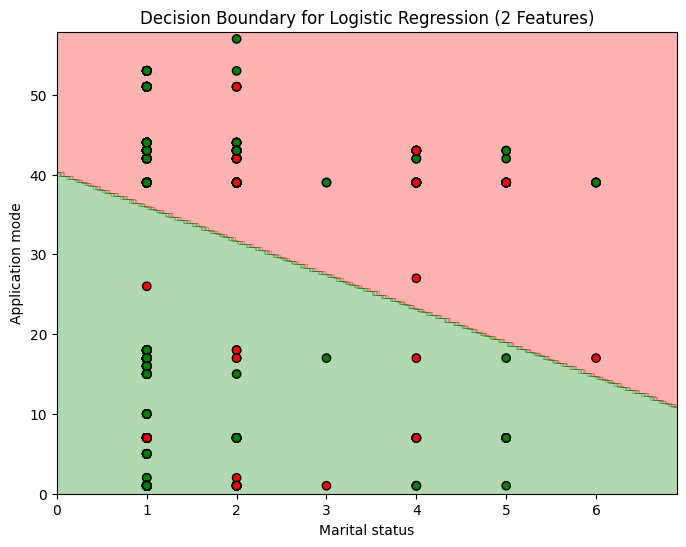

In [ ]:
from matplotlib.colors import ListedColormap

# Only works for 2 features
X_vis = X.iloc[:, :2].values
y_vis = y.values

model_vis = LogisticRegression()
model_vis.fit(X_vis, y_vis)

# Create grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on grid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=ListedColormap(('red', 'green')), edgecolor='k')
plt.title('Decision Boundary for Logistic Regression (2 Features)')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()
